# California 90s Housing Market
### Discover what drove the housing market price in that time
Data Science Project

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

%matplotlib inline

In [99]:
df = pd.read_csv('train.csv')

In [64]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [102]:
df.shape

(1460, 81)

In [100]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Analysis

First lets study the 'SalePrice' column and find out what has the most correlation with it

In [66]:
df[['Id', 'SalePrice']]

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000
...,...,...
1455,1456,175000
1456,1457,210000
1457,1458,266500
1458,1459,142125


In [67]:
df['SalePrice'].mean()

180921.19589041095

In [80]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

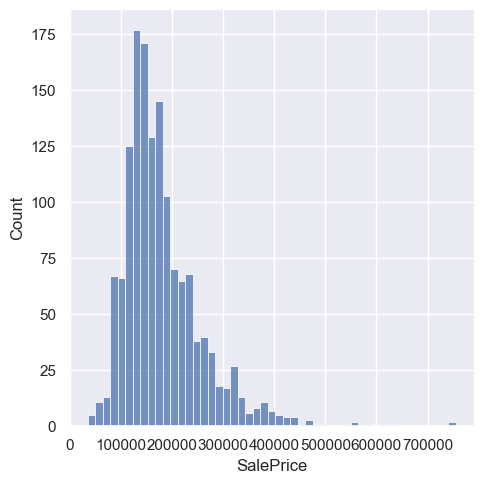

In [81]:
sns.displot(df['SalePrice'])

In [82]:
df['SalePrice'].skew()

1.8828757597682129

In [83]:
df['SalePrice'].kurt()

6.536281860064529

Kurt and Skew
Seems to be high

In [106]:
numeric_df = df.select_dtypes(include=['number'])

cormat = numeric_df.corr()

##we can work only with numeric values

<Axes: >

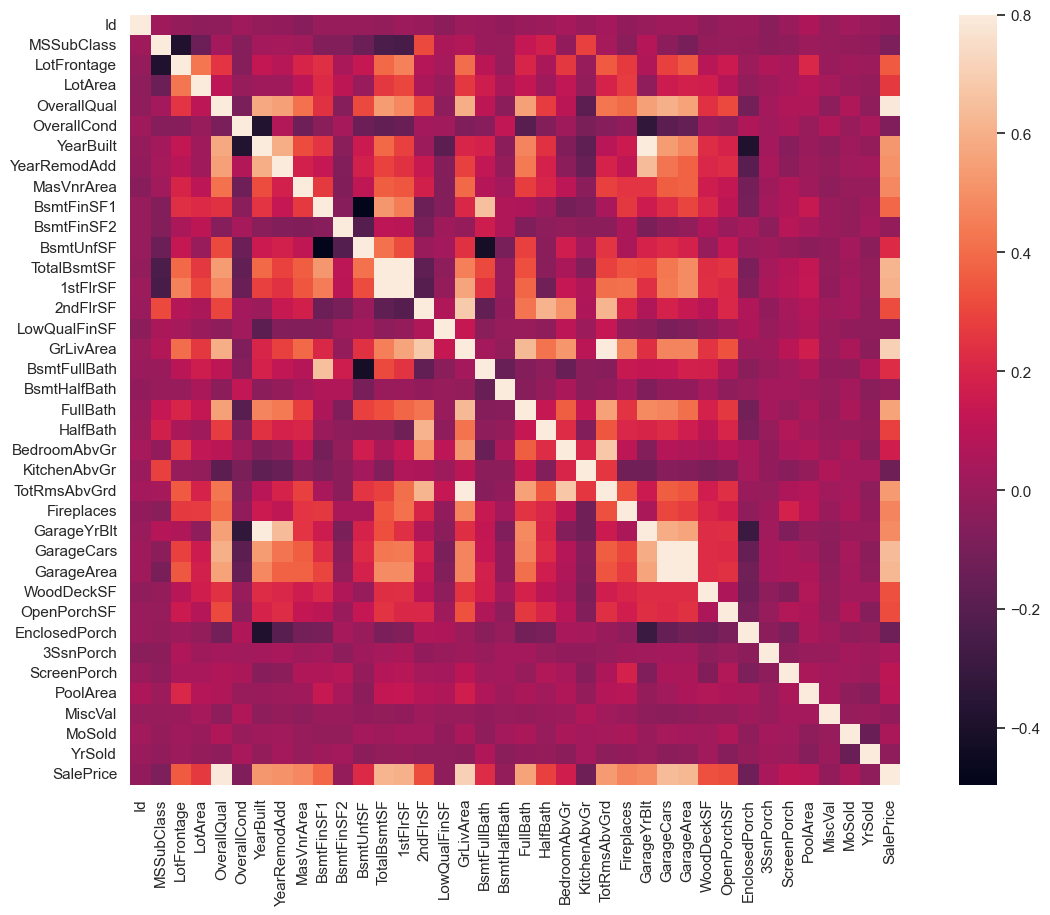

In [105]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cormat, vmax=.8, square=True)

In [103]:
k=10

##Top 10

In [72]:
cols = cormat.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [109]:
cm = np.corrcoef(df[cols].values.T)

##numpy stuff

In [108]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.61358055,
        0.56066376, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.5378085 ,
        0.55059971, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.4548682 ,
        0.63001165, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.43458483,
        0.46967204, 0.53785009],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 1.        ,
        0.32372241, 0.391452  ],
       [0.56066376, 0.55059971, 0.63001165, 0.46967204, 0.32372241,
        1.        , 0.46827079],
       [0.52289733, 0.57232277, 0.19900971, 0.53785009, 0.391452  ,
        0.46827079, 1.        ]])

In [75]:
sns.set(font_scale=1.25)

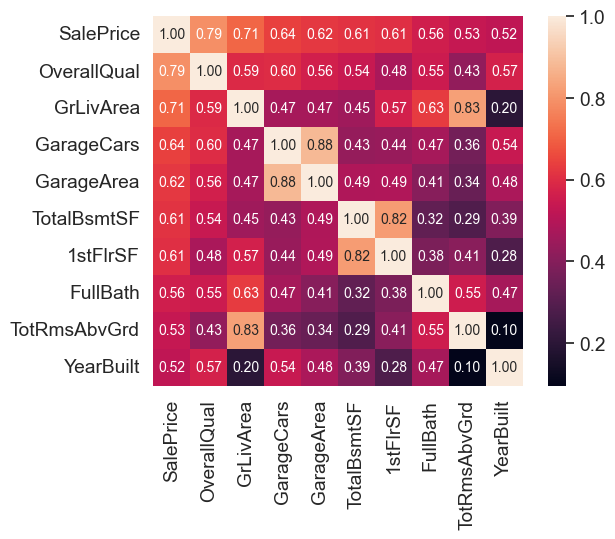

In [76]:
hm = sns.heatmap(cm, cbar=True , annot=True, square=True, fmt=".2f", annot_kws={"size":10}, yticklabels=cols.values, xticklabels=cols.values)

In [77]:
sns.set()

These are the columns we conseider have the most correlation with SalePrice

In [78]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


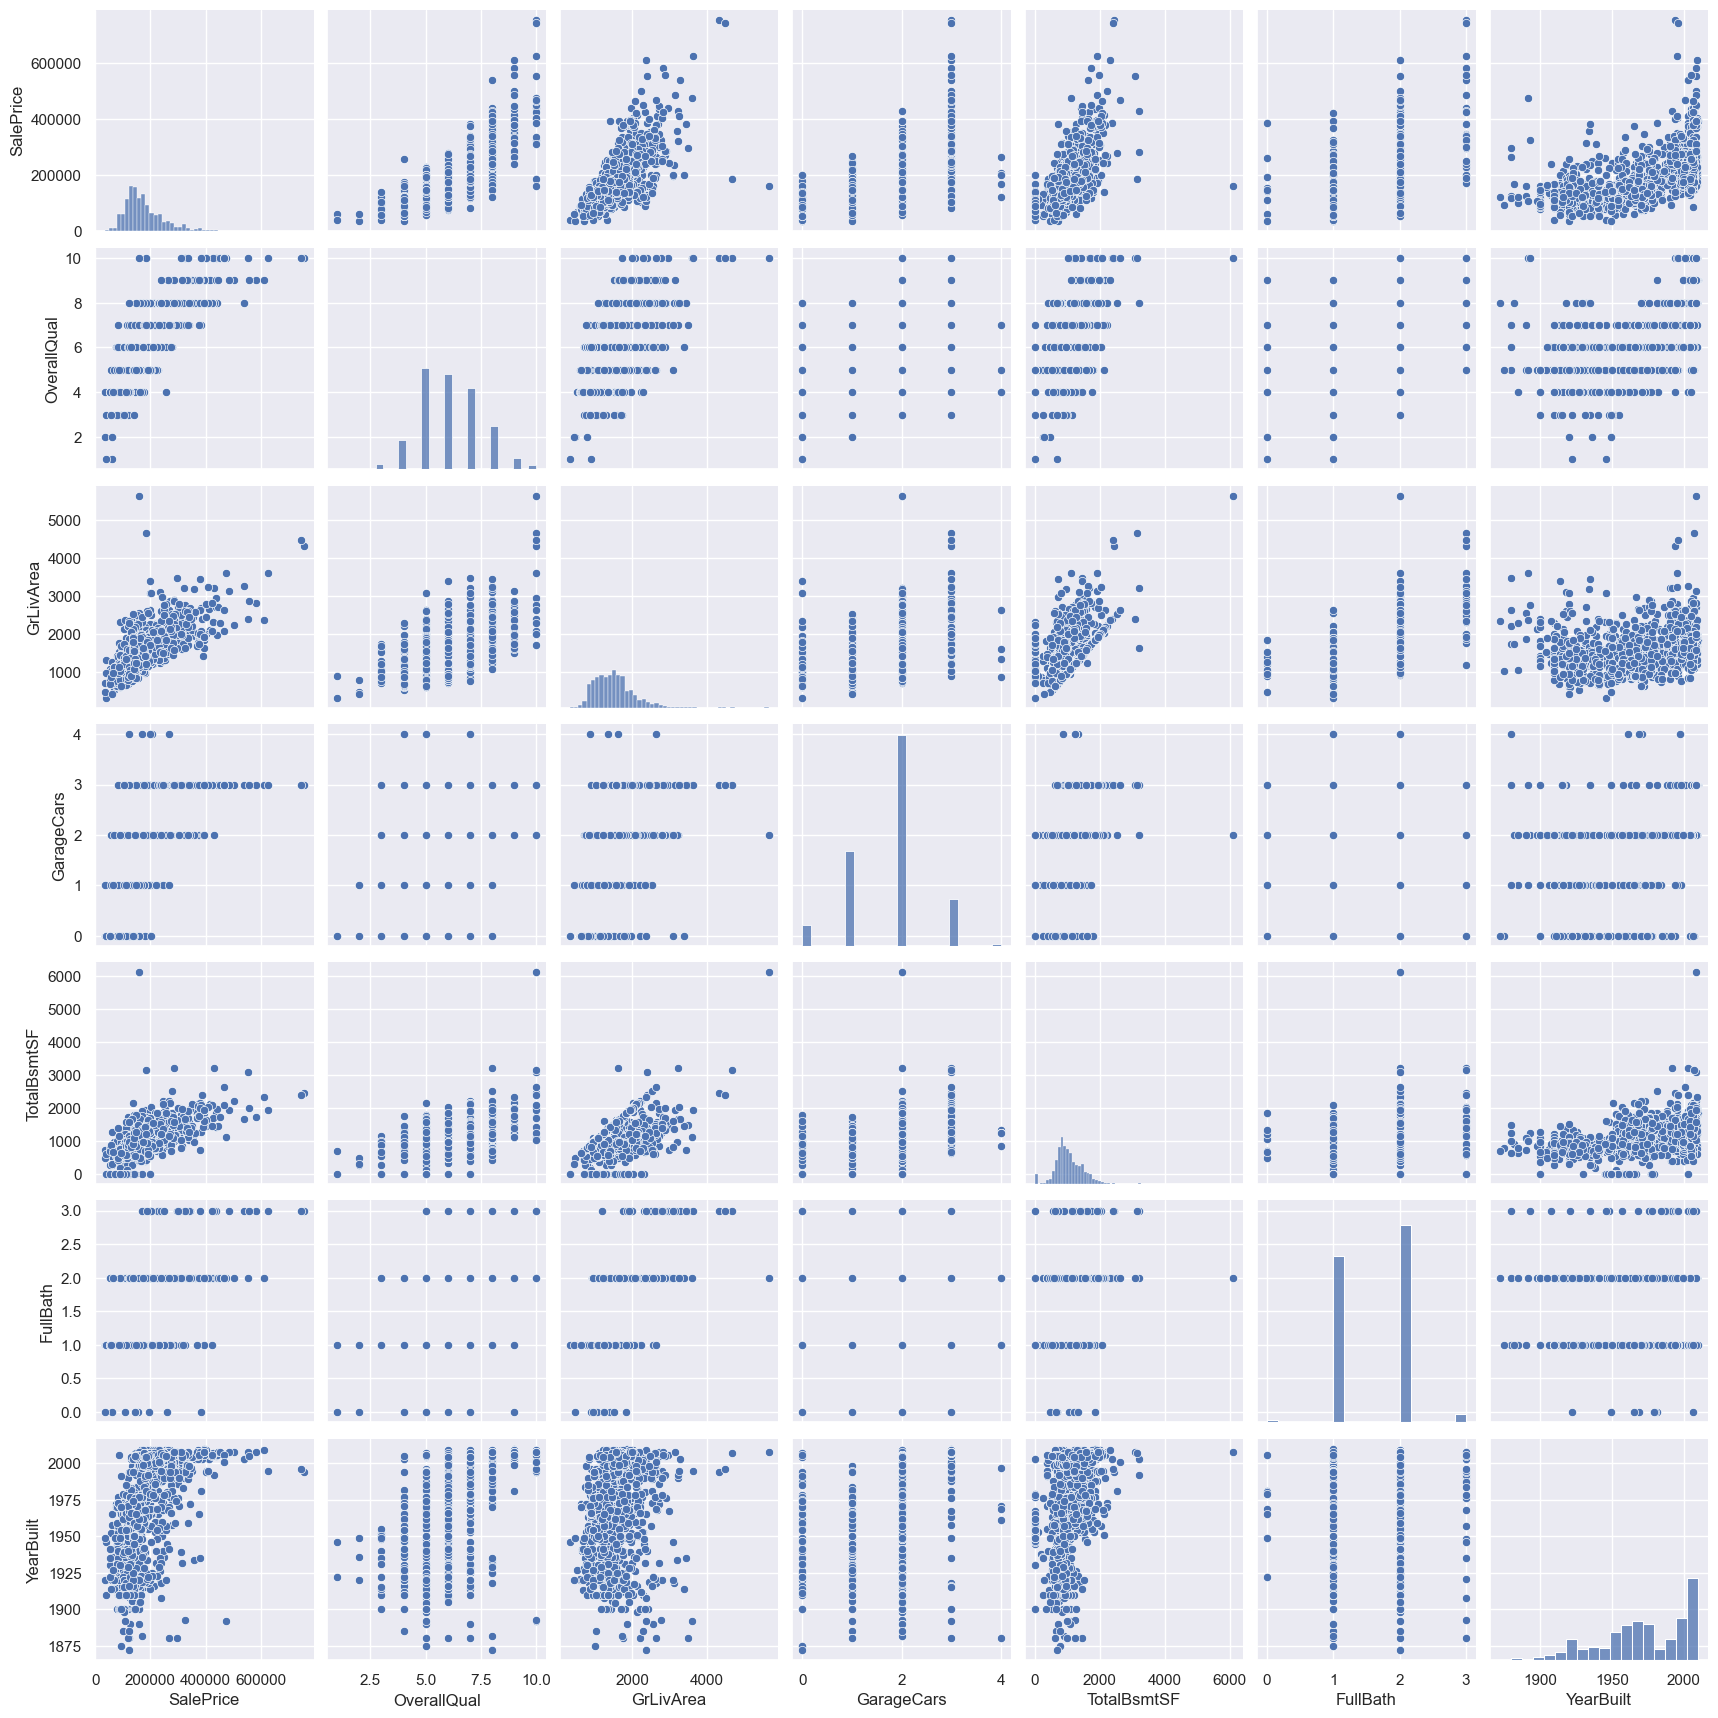

In [79]:
sns.pairplot(df[cols], size=2.5)
plt.show()

### Lets compare with the living area

In [84]:
var = 'GrLivArea'

In [85]:
data  = pd.concat([df['SalePrice'], df[var]], axis=1)

In [86]:
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

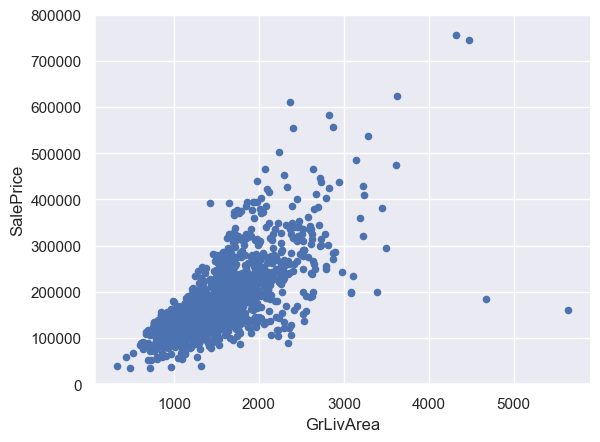

In [87]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

### Now lets see how correlated is with the basement

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

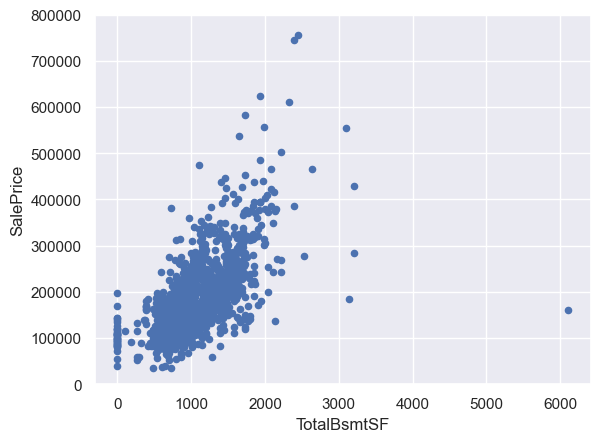

In [88]:
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

### Now Lets see house quality

In [89]:
var = 'OverallQual'

In [90]:
data = pd.concat([df['SalePrice'], df[var]], axis=1)

In [91]:
data.head()

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


(-0.5, 9.5, 0.0, 800000.0)

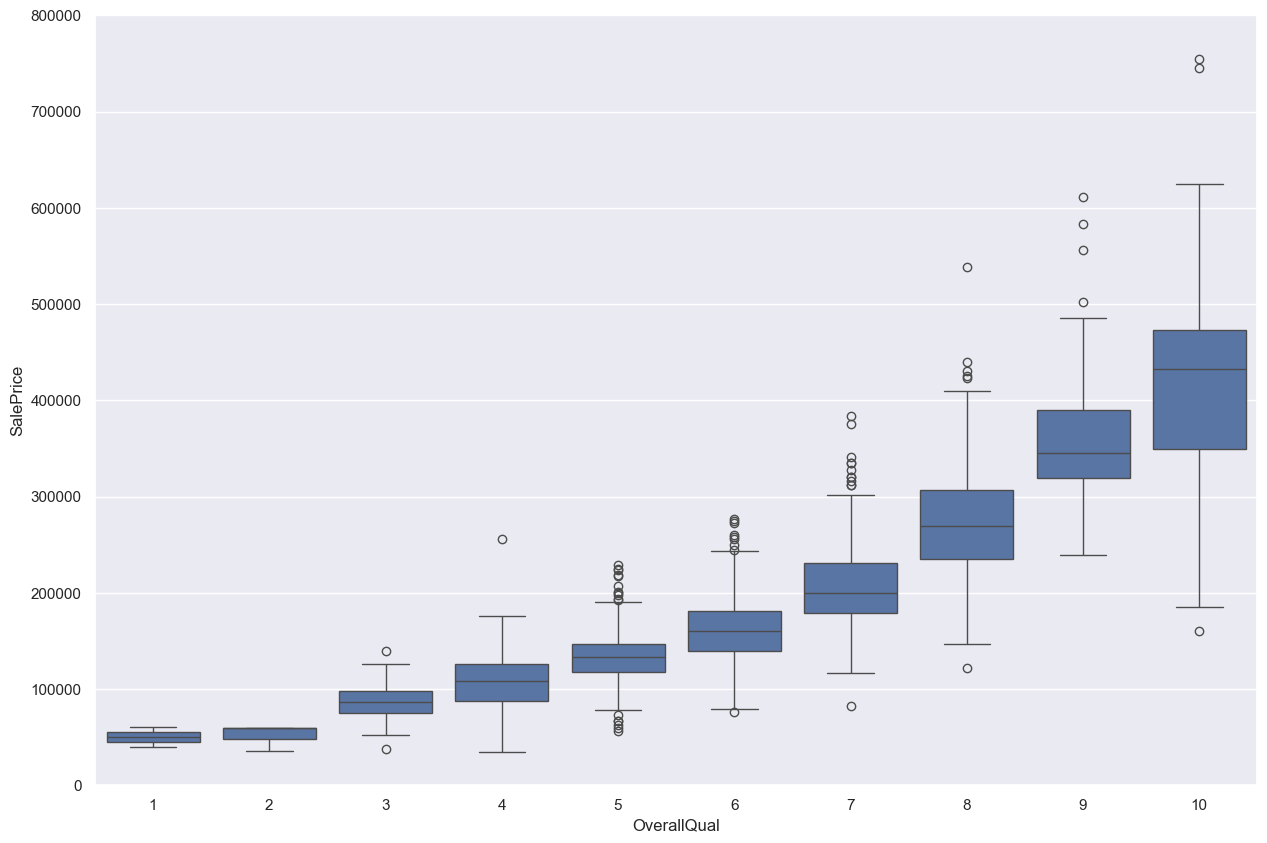

In [92]:
f, ax = plt.subplots(figsize=(15,10))
fig = sns.boxplot(x=var, y='SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)

Here, as we can see there is a clear positive correlation between sale price and quality of the house. However, we can see there are high quality houses that sells at a lower price, that is due to the wide range of quality houses in the market

### Year Built

In [93]:
var = 'YearBuilt'

In [94]:
data = pd.concat([df['SalePrice'], df[var]], axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


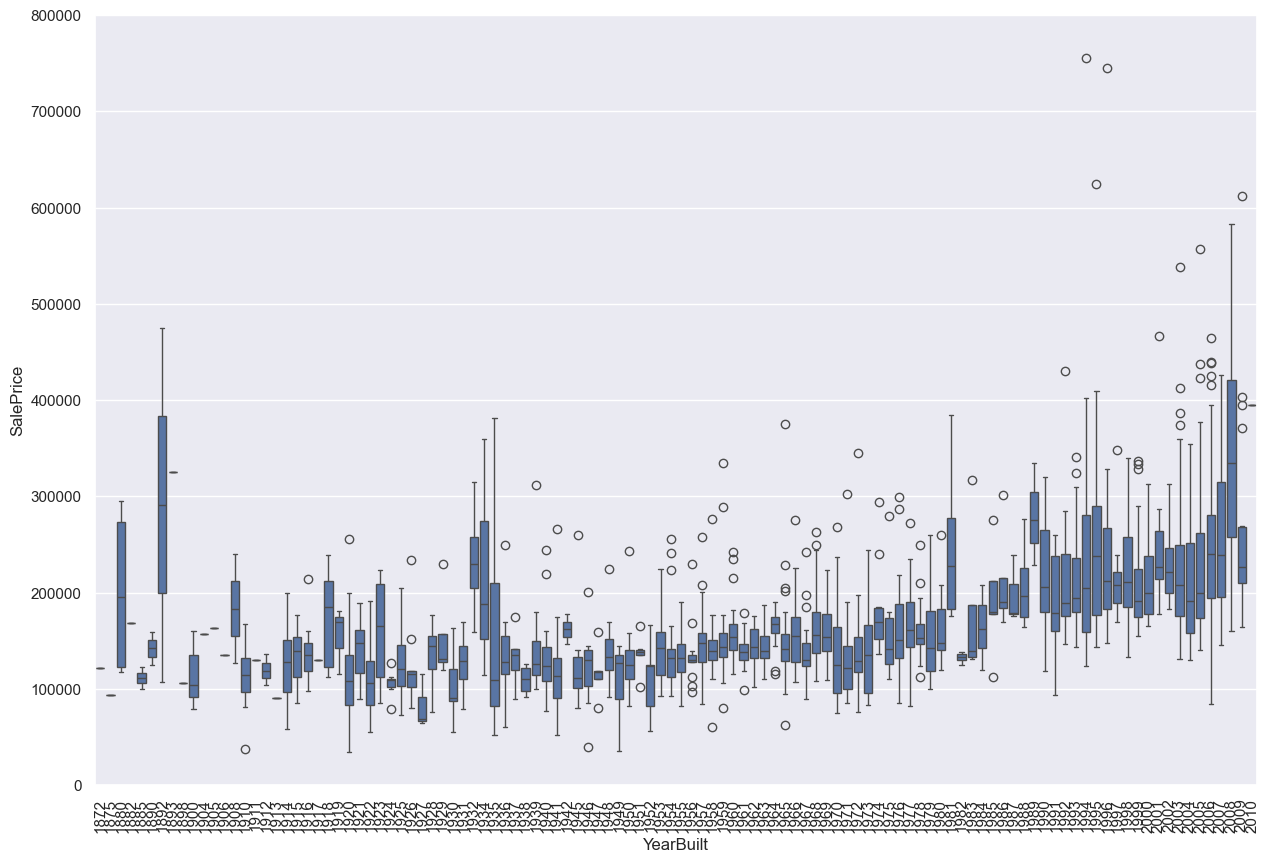

In [95]:
f, ax = plt.subplots(figsize=(15,10))
fig = sns.boxplot(x=var, y='SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

We kind of predicted this graph, the newer the house the more expensive it gets. But, there is a huge amount of old houses that sells very well, we can speculate it maybe a fact of historical meaning but for that we would need a deeper study...